### doc

shape=plaintext, box, circle

layout = dot, neato, sfdp, fdp

http://www.graphviz.org/doc/info/attrs.html#d:model

https://stackoverflow.com/questions/2649781/graphviz-dot-arrange-nodes-in-circles-layout-too-compact

In [158]:
class keydefaultdict(defaultdict):
    def __missing__(self, key):
        if self.default_factory is None:
            raise KeyError( key )
        else:
            ret = self[key] = self.default_factory(key)
            return ret

In [159]:
from collections import defaultdict 

class Team():
    
    def __init__(self, name):
        self.name = name
        self.employee_set = set()
        
    def add(self, e_name):
        self.employee_set.add(e_name)
        
class Employee():
    
    def __init__(self, name):
        self.name = name
        self.contacts = set()
        
    def add(self, contact):
        assert self.name != contact
        self.contacts.add(contact)

class Company():
    
    def __init__(self):
        self.employee_set = keydefaultdict(Employee)
        self.team_dict = keydefaultdict(Team)
        
    def add_employee_and_team(self, send, recv, g_name=None):
        self.employee_set[send].add(recv)
        self.employee_set[recv].add(send)
        if g_name:
            g = self.team_dict[g_name]
            g.add(send)
            g.add(recv)

In [160]:
s1 = Company()

In [162]:
employees = list('person' + str(i) for i in range(10))
teams = list('group' + str(i) for i in range(2))

import random

for i in range(30):
    send = random.randint(0, len(employees) - 1)
    recv = random.randint(0, len(employees) - 1)
    if send == recv:
        continue
    team_num = random.randint(0, len(teams) + len(teams))
    team_name = employees[team_num] if team_num < len(teams) else None 
    s1.add_employee_and_team(employees[send], employees[recv], team_name)

In [165]:
import pygraphviz

In [166]:
G = pgv.AGraph()

In [167]:
for e in s1.employee_set:
    G.add_node(e)
    for contact in s1.employee_set[e].contacts:
        G.add_edge(e, contact)

In [168]:
for g in s1.team_dict:
    G.add_node(g,  color="red", shape='plaintext')
    for e in s1.team_dict[g].employee_set:
        G.add_edge(g, e, color='blue')

In [169]:

G.layout(prog="neato")

G.draw("./company.png")

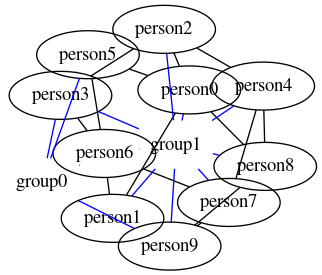

In [170]:
from IPython.display import Image
Image(filename='./file.png') 